In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('50_Startups.csv')

In [3]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [5]:
dataset.shape

(50, 5)

science there are no missing values in the dataset .

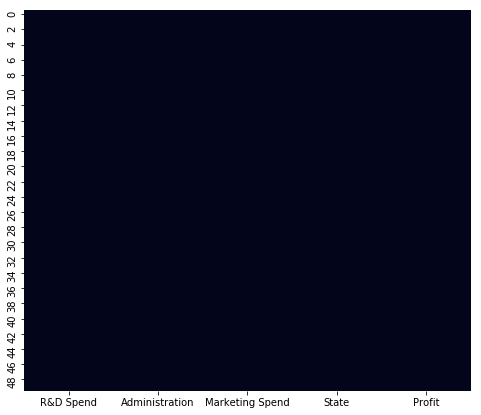

In [6]:
plt.figure(figsize=(8,7))
sns.heatmap(dataset.isnull(),cbar =False)

Data Preprocessing

In [7]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,4].values

CATEGORICAL VARIABLE TREATMENT

In [8]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [9]:
encode_X= LabelEncoder()
X[:,3]= encode_X.fit_transform(X[:,3])
hotencode = OneHotEncoder(categorical_features=[3])
X = hotencode.fit_transform(X).toarray()

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


##### avoiding the Dummy variable Trap

In [10]:
X = X[:,1:]

In [11]:
df1 = pd.DataFrame(X)

In [12]:
df1

,0,1,2,3,4
0,0.0,1.0,165349.20,136897.80,471784.10
1,0.0,0.0,162597.70,151377.59,443898.53
2,1.0,0.0,153441.51,101145.55,407934.54
3,0.0,1.0,144372.41,118671.85,383199.62
4,1.0,0.0,142107.34,91391.77,366168.42
5,0.0,1.0,131876.90,99814.71,362861.36
6,0.0,0.0,134615.46,147198.87,127716.82
7,1.0,0.0,130298.13,145530.06,323876.68
8,0.0,1.0,120542.52,148718.95,311613.29
9,0.0,0.0,123334.88,108679.17,304981.62


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.2,random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
Y_pred = regressor.predict(X_test)

In [18]:
Y_pred

array([103015.20159796, 132582.27760815, 132447.73845175,  71976.09851258,
       178537.48221056, 116161.24230166,  67851.69209676,  98791.73374687,
       113969.43533013, 167921.06569551])